In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Substitua o 'caminho_do_arquivo.csv' pelo caminho real do seu arquivo CSV
arquivo_csv = '/content/drive/MyDrive/Colab Notebooks/2023/SBBD_toxic/data/train_toldbr.csv'

# Ler o arquivo CSV
dados = pd.read_csv(arquivo_csv)

# Mostrar as primeiras linhas do DataFrame
print(dados.head())


                                                text  Toxic  \
0  Meu nivel de amizade com isis é ela ter meu in...    1.0   
1  rt @user @user o cara adultera dados, que fora...    1.0   
2  @user @user @user o cara só é simplesmente o m...    1.0   
3  eu to chorando vei vsf e eu nem staneio izone ...    1.0   
4  tem um do jack com a msm música e agr não sei ...    0.0   

                                          clean_text  
0  Meu nivel de amizade com isis é ela ter meu in...  
1  rt @user @user o cara adultera dados, que fora...  
2  @user @user @user o cara só é simplesmente o m...  
3  eu to chorando vei vsf e eu nem staneio izone ...  
4  tem um do jack com a msm música e agr não sei ...  


Este código carrega os dados de treino e teste, cria um modelo de classificação BERTimbau, treina-o no conjunto de dados de treino e avalia-o no conjunto de dados de teste. Ele exibe F1-Score, precisão, recall e matriz de confusão como resultado. Deve-se instalar o pacote simpletransformers.

In [4]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 22

In [ ]:
# baseado em https://github.com/ThilinaRajapakse/simpletransformers
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from simpletransformers.classification import ClassificationModel
from sklearn.model_selection import train_test_split
import numpy as np

# Carregar os dados de treino e teste
arquivo_csv_treino = '/content/drive/MyDrive/Colab Notebooks/2023/SBBD_toxic/data/train_toldbr.csv'
arquivo_csv_teste = '/content/drive/MyDrive/Colab Notebooks/2023/SBBD_toxic/data/test_toldbr.csv'

dados_treino = pd.read_csv(arquivo_csv_treino)
dados_teste = pd.read_csv(arquivo_csv_teste)

train_df = pd.DataFrame({'text': dados_treino.iloc[:, 2], 'labels': dados_treino.iloc[:, 1]})
eval_df = pd.DataFrame({'text': dados_teste.iloc[:, 2], 'labels': dados_teste.iloc[:, 1]})

print(train_df.head())

print(eval_df['labels'].unique())
print(eval_df['labels'].unique())

# Criar o modelo de classificação
model_args = {
    'num_train_epochs': 3,
    'train_batch_size': 8,
    'eval_batch_size': 8,
    'overwrite_output_dir': True,
    'save_steps': -1,
    'save_model_every_epoch': False,
    'learning_rate': 3e-5,
    'fp16': True,
}

model = ClassificationModel(
    'bert',
    'neuralmind/bert-base-portuguese-cased',
    num_labels=2,
    args=model_args,
    use_cuda=True,  # Se estiver usando uma GPU, você pode mudar para True
)

# Treinar o modelo nos dados de treino
model.train_model(train_df)

# Avaliar o modelo nos dados de teste
#result, model_outputs, wrong_predictions = model.eval_model(eval_df)
predictions, raw_outputs = model.predict(eval_df['text'].tolist())

predicted_labels = np.argmax(raw_outputs, axis=1)
print("Rótulos únicos em predicted_labels:", np.unique(predicted_labels))

f1 = f1_score(eval_df['labels'], predicted_labels)
precision = precision_score(eval_df['labels'], predicted_labels)
recall = recall_score(eval_df['labels'], predicted_labels)
conf_matrix = confusion_matrix(eval_df['labels'], predicted_labels)

print("F1-Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Matriz de Confusão:\n", conf_matrix)




                                                text  labels
0  Meu nivel de amizade com isis é ela ter meu in...     1.0
1  rt @user @user o cara adultera dados, que fora...     1.0
2  @user @user @user o cara só é simplesmente o m...     1.0
3  eu to chorando vei vsf e eu nem staneio izone ...     1.0
4  tem um do jack com a msm música e agr não sei ...     0.0


ValueError: ignored

Resultados na Nevasca:


```
# Rótulos únicos em predicted_labels: [0 1]
F1-Score: 0.7486092715231788
Precision: 0.7291021671826625
Recall: 0.769188894937398
Matriz de Confusão:
 [[1801  525]
 [ 424 1413]]
```



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
from simpletransformers.classification import ClassificationModel

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

seed_value = 42

# Set the random seed for PyTorch
torch.manual_seed(seed_value)

# If you're using CUDA or cuDNN, also set the seed for those
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set the random seed for NumPy
np.random.seed(seed_value)

# Carregar os dados de treino e teste
arquivo_csv_treino = '/content/drive/MyDrive/Colab Notebooks/2023/SBBD_toxic/data/train_toldbr.csv'
arquivo_csv_teste = '/content/drive/MyDrive/Colab Notebooks/2023/SBBD_toxic/data/test_toldbr.csv'

dados_treino = pd.read_csv(arquivo_csv_treino)
dados_teste = pd.read_csv(arquivo_csv_teste)

train_df = pd.DataFrame({'text': dados_treino.iloc[:, 2], 'labels': dados_treino.iloc[:, 1]})
eval_df = pd.DataFrame({'text': dados_teste.iloc[:, 2], 'labels': dados_teste.iloc[:, 1]})

print(train_df.head())

# Criar o modelo de classificação
model_args = {
    'num_train_epochs': 10,
    'train_batch_size': 8,
    'eval_batch_size': 8,
    'overwrite_output_dir': True,
    'save_steps': -1,
    'save_model_every_epoch': False,
    'learning_rate': 3e-5,
    'fp16': True,
    #'evaluate_during_training' : True,
    'output_dir' : "/content/drive/MyDrive/Colab Notebooks/2023/SBBD_toxic/output/",
}

#model_args.evaluate_during_training = True
#model_args.output_dir = "/content/drive/MyDrive/Colab Notebooks/2023/SBBD_toxic/output/"


model = ClassificationModel(
    'bert',
    'neuralmind/bert-base-portuguese-cased',
    num_labels=2,
    args=model_args,
    use_cuda=True,  # Se estiver usando uma GPU, você pode mudar para True
)


# Treinar o modelo nos dados de treino
model.train_model(train_df)

# Avaliar o modelo nos dados de teste
predictions, raw_outputs = model.predict(eval_df['text'].tolist())

predicted_labels = np.argmax(raw_outputs, axis=1)
print("Rótulos únicos em predicted_labels:", np.unique(predicted_labels))

# Gerar o relatório de classificação
report = classification_report(eval_df['labels'], predicted_labels, output_dict=True)

print("Classificação Report:")
for label, metrics in report.items():
    if label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    print(f"Class: {label}")
    print(f"\tPrecision: {metrics['precision']}")
    print(f"\tRecall: {metrics['recall']}")
    print(f"\tF1-score: {metrics['f1-score']}")
print(f"Macro Avg: {report['macro avg']}")
print(f"Weighted Avg: {report['weighted avg']}")

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(eval_df['labels'], predicted_labels)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Carregando os logs de treinamento
logs = pd.read_csv(f'{model_args.output_dir}training_progress_scores.csv')

# Plotando as curvas de loss
plt.plot(logs['global_step'], logs['train_loss'], label='train_loss')
plt.plot(logs['global_step'], logs['eval_loss'], label='eval_loss')
plt.xlabel('Global Step')
plt.ylabel('Loss')
plt.legend()
plt.show()


                                                text  labels
0  Meu nivel de amizade com isis é ela ter meu in...     1.0
1  rt @user @user o cara adultera dados, que fora...     1.0
2  @user @user @user o cara só é simplesmente o m...     1.0
3  eu to chorando vei vsf e eu nem staneio izone ...     1.0
4  tem um do jack com a msm música e agr não sei ...     0.0


Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the

ValueError: ignored

## Teste cross dataset

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

# Carregar os dados de treino
arquivo_csv_treino = '/content/drive/MyDrive/Colab Notebooks/2023/SBBD_toxic/data/hate_speech_data_paula.csv'
dados_treino = pd.read_csv(arquivo_csv_treino)

# Pré-processamento dos dados de treino
X = dados_treino.iloc[:, :-1]  # Dados independetes
y = dados_treino.iloc[:, -1]   # Dados dependentes (rótulos)

# Separar os dados por classe
dados_classe_0 = dados_treino[dados_treino[y.name] == 0]
dados_classe_1 = dados_treino[dados_treino[y.name] == 1]

# Selecionar aleatoriamente 2326 instâncias da classe 0
# Se existirem menos do que 2326 instâncias, pegue todas as disponíveis
dados_classe_0 = dados_classe_0.sample(n=min(len(dados_classe_0), 2326), random_state=42)

# Selecionar aleatoriamente 1837 instâncias da classe 1
# Se existirem menos do que 1837 instâncias, pegue todas as disponíveis
dados_classe_1 = dados_classe_1.sample(n=min(len(dados_classe_1), 1837), random_state=42)

# Juntar os dados e embaralhar
dados_treino_balanceados = pd.concat([dados_classe_0, dados_classe_1])
dados_treino_balanceados = shuffle(dados_treino_balanceados, random_state=42)

# Salvar o novo conjunto em disco
dados_treino_balanceados.to_csv('/content/drive/MyDrive/Colab Notebooks/2023/SBBD_toxic/data/HLPHSD_subset.csv', index=False)


                                                text  labels
0  Meu nivel de amizade com isis é ela ter meu in...     1.0
1  rt @user @user o cara adultera dados, que fora...     1.0
2  @user @user @user o cara só é simplesmente o m...     1.0
3  eu to chorando vei vsf e eu nem staneio izone ...     1.0
4  tem um do jack com a msm música e agr não sei ...     0.0


Some weights of the model checkpoint at neuralmind/bert-base-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the

  0%|          | 0/16650 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/2082 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/2082 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/2082 [00:00<?, ?it/s]

  0%|          | 0/4112 [00:00<?, ?it/s]

  0%|          | 0/514 [00:00<?, ?it/s]

Rótulos únicos em predicted_labels: [0 1]
Classificação Report:
Class: 0
	Precision: 0.7069475240206947
	Recall: 0.8224419604471195
	F1-score: 0.7603338632750397
Class: 1
	Precision: 0.7062588904694168
	Recall: 0.5559910414333706
	F1-score: 0.6221804511278195
Macro Avg: {'precision': 0.7066032072450558, 'recall': 0.6892165009402451, 'f1-score': 0.6912571572014297, 'support': 4112}
Weighted Avg: {'precision': 0.7066484239422456, 'recall': 0.7067120622568094, 'f1-score': 0.7003285145165438, 'support': 4112}


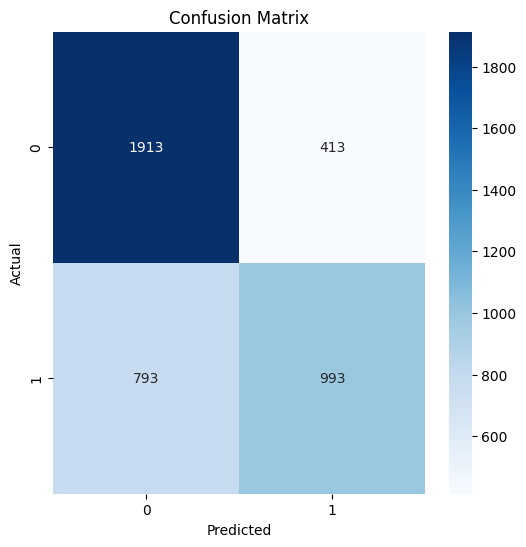

In [ ]:
# Teste cruzado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
from simpletransformers.classification import ClassificationModel

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

seed_value = 42

# Set the random seed for PyTorch
torch.manual_seed(seed_value)

# If you're using CUDA or cuDNN, also set the seed for those
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set the random seed for NumPy
np.random.seed(seed_value)

# Carregar os dados de treino e teste
arquivo_csv_treino = '/content/drive/MyDrive/Colab Notebooks/2023/SBBD_toxic/data/train_toldbr.csv'
arquivo_csv_teste = '/content/drive/MyDrive/Colab Notebooks/2023/SBBD_toxic/data/HLPHSD_subset.csv'

dados_treino = pd.read_csv(arquivo_csv_treino)
dados_teste = pd.read_csv(arquivo_csv_teste)

train_df = pd.DataFrame({'text': dados_treino.iloc[:, 2], 'labels': dados_treino.iloc[:, 1]})
eval_df = pd.DataFrame({'text': dados_teste.iloc[:, 0], 'labels': dados_teste.iloc[:, 1]})

print(train_df.head())

# Criar o modelo de classificação
model_args = {
    'num_train_epochs': 3,
    'train_batch_size': 8,
    'eval_batch_size': 8,
    'overwrite_output_dir': True,
    'save_steps': -1,
    'save_model_every_epoch': False,
    'learning_rate': 3e-5,
    'fp16': True,
}

model = ClassificationModel(
    'bert',
    'neuralmind/bert-base-portuguese-cased',
    num_labels=2,
    args=model_args,
    use_cuda=True,  # Se estiver usando uma GPU, você pode mudar para True
)

# Treinar o modelo nos dados de treino
model.train_model(train_df)

# Avaliar o modelo nos dados de teste
predictions, raw_outputs = model.predict(eval_df['text'].tolist())

predicted_labels = np.argmax(raw_outputs, axis=1)
print("Rótulos únicos em predicted_labels:", np.unique(predicted_labels))

# Gerar o relatório de classificação
report = classification_report(eval_df['labels'], predicted_labels, output_dict=True)

print("Classificação Report:")
for label, metrics in report.items():
    if label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    print(f"Class: {label}")
    print(f"\tPrecision: {metrics['precision']}")
    print(f"\tRecall: {metrics['recall']}")
    print(f"\tF1-score: {metrics['f1-score']}")
print(f"Macro Avg: {report['macro avg']}")
print(f"Weighted Avg: {report['weighted avg']}")

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(eval_df['labels'], predicted_labels)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
